# Uber Supply Demand Gap- Assignment

In [1]:
#Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

In [3]:
# Reading the Comma-seperated file by using "," as a seperator
uber = pd.read_csv("Uber Request Data.csv",sep=",")

#Printing the csv file
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


# 1) Inspecting and Cleaning Data

In [4]:
#Inspecting the data
uber.info()

#Detecting the number of missing values for each column of the dataset
uber.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [5]:
#Splitting the column 'Request timestamp' into two columns (date and time) based on the delimiter 'space'
uber[['Request_date','Request_time']] = uber['Request timestamp'].str.split(' ',expand=True)

#Deleting the column 'Request timestamp'
del uber['Request timestamp']

#Printing the modified dataframe
uber

,Request id,Pickup point,Driver id,Status,Drop timestamp,Request_date,Request_time
0,619,Airport,1.0,Trip Completed,11/7/2016 13:00,11/7/2016,11:51
1,867,Airport,1.0,Trip Completed,11/7/2016 18:47,11/7/2016,17:57
2,1807,City,1.0,Trip Completed,12/7/2016 9:58,12/7/2016,9:17
3,2532,Airport,1.0,Trip Completed,12/7/2016 22:03,12/7/2016,21:08
4,3112,City,1.0,Trip Completed,13-07-2016 09:25:47,13-07-2016,08:33:16
5,3879,Airport,1.0,Trip Completed,13-07-2016 22:28:59,13-07-2016,21:57:28
6,4270,Airport,1.0,Trip Completed,14-07-2016 07:13:15,14-07-2016,06:15:32
7,5510,Airport,1.0,Trip Completed,15-07-2016 06:07:52,15-07-2016,05:11:52
8,6248,City,1.0,Trip Completed,15-07-2016 18:50:51,15-07-2016,17:57:27
9,267,City,2.0,Trip Completed,11/7/2016 7:25,11/7/2016,6:46


In [6]:
#Splitting the column 'Drop timestamp' into two columns (date and time) based on the delimiter 'space'
uber[['Drop_Date','Drop_Time']] = uber['Drop timestamp'].str.split(' ',expand=True)

#Deleting the column 'Drop timestamp'
del uber['Drop timestamp']

#Printing the modified dataframe
uber

,Request id,Pickup point,Driver id,Status,Request_date,Request_time,Drop_Date,Drop_Time
0,619,Airport,1.0,Trip Completed,11/7/2016,11:51,11/7/2016,13:00
1,867,Airport,1.0,Trip Completed,11/7/2016,17:57,11/7/2016,18:47
2,1807,City,1.0,Trip Completed,12/7/2016,9:17,12/7/2016,9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016,21:08,12/7/2016,22:03
4,3112,City,1.0,Trip Completed,13-07-2016,08:33:16,13-07-2016,09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016,21:57:28,13-07-2016,22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016,06:15:32,14-07-2016,07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016,05:11:52,15-07-2016,06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016,17:57:27,15-07-2016,18:50:51
9,267,City,2.0,Trip Completed,11/7/2016,6:46,11/7/2016,7:25


# 2) Data Analysis

Text(0,0.5,'Frequency')

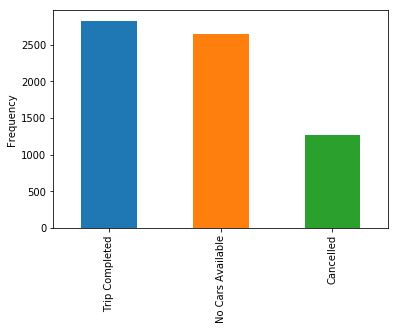

In [46]:
import matplotlib.pyplot as plt

# Plotting a bar chart depicting the frequency of requests corresponding to Status
bar_1 = uber['Status'].value_counts().plot(kind='bar')

# Giving a label 'Frequency' to the y-axis
bar_1.set_ylabel("Frequency")

# We can see that there is a high percentage of 'No Cars Available' and 'Cancelled'

In [8]:
# Creating a new dataframe 'uber_city' which contains data only for pickup point 'City'
uber_city = uber[~uber['Pickup point'].isin(['Airport'])]

# Creating a mew dataframe 'uber_airport' which contains data only for pickup point 'Airport'
uber_airport=uber[~uber['Pickup point'].isin(['City'])]

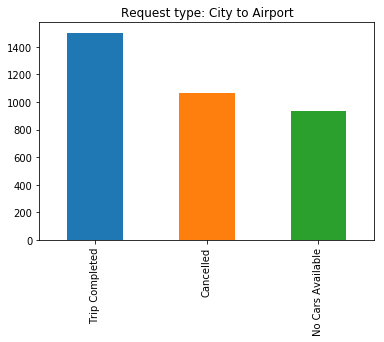

In [9]:
# Plotting a bar chart depicting the frequency of requests corresponding to Status for request type- City to Airport

bar_2 = uber_city['Status'].value_counts().plot(kind='bar',title="Request type: City to Airport")

# We can see that for city to airport the ratio of cancelled requests has significantly increased from overall value.

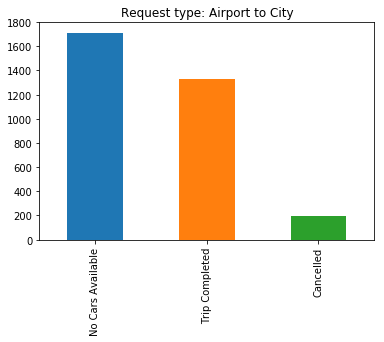

In [10]:
# Plotting a bar chart depicting the frequency of requests corresponding to Status for request type- Airport to City

bar_3 = uber_airport['Status'].value_counts().plot(kind='bar',title="Request type: Airport to City")

# We can clearly see the large spike for 'No Cars Available' for airport to city

In [11]:
# Creating a new column 'Request_hour' by extracting the hours from Request_time using ':' delimiter
uber['Request_hour'] = uber['Request_time'].str.split(':').str[0]
uber

,Request id,Pickup point,Driver id,Status,Request_date,Request_time,Drop_Date,Drop_Time,Request_hour
0,619,Airport,1.0,Trip Completed,11/7/2016,11:51,11/7/2016,13:00,11
1,867,Airport,1.0,Trip Completed,11/7/2016,17:57,11/7/2016,18:47,17
2,1807,City,1.0,Trip Completed,12/7/2016,9:17,12/7/2016,9:58,9
3,2532,Airport,1.0,Trip Completed,12/7/2016,21:08,12/7/2016,22:03,21
4,3112,City,1.0,Trip Completed,13-07-2016,08:33:16,13-07-2016,09:25:47,08
5,3879,Airport,1.0,Trip Completed,13-07-2016,21:57:28,13-07-2016,22:28:59,21
6,4270,Airport,1.0,Trip Completed,14-07-2016,06:15:32,14-07-2016,07:13:15,06
7,5510,Airport,1.0,Trip Completed,15-07-2016,05:11:52,15-07-2016,06:07:52,05
8,6248,City,1.0,Trip Completed,15-07-2016,17:57:27,15-07-2016,18:50:51,17
9,267,City,2.0,Trip Completed,11/7/2016,6:46,11/7/2016,7:25,6


In [12]:
# Changing the datatype of Request_hour to numerical
uber["Request_hour"] = pd.to_numeric(uber["Request_hour"])

# Creating a new column names 'Time_slot' which categorizes the various hours into morning, afternoon, evening and night
conditions = [ 
    (uber['Request_hour'] >0) & (uber['Request_hour'] < 6) ,
    (uber['Request_hour'] >= 6) & (uber['Request_hour'] < 12)  ,
    (uber['Request_hour'] >=12) & (uber['Request_hour'] < 18) ]
choices = ['night', 'morning', 'afternoon']
uber['Time_slot'] = np.select(conditions, choices, default='evening')
uber

,Request id,Pickup point,Driver id,Status,Request_date,Request_time,Drop_Date,Drop_Time,Request_hour,Time_slot
0,619,Airport,1.0,Trip Completed,11/7/2016,11:51,11/7/2016,13:00,11,morning
1,867,Airport,1.0,Trip Completed,11/7/2016,17:57,11/7/2016,18:47,17,afternoon
2,1807,City,1.0,Trip Completed,12/7/2016,9:17,12/7/2016,9:58,9,morning
3,2532,Airport,1.0,Trip Completed,12/7/2016,21:08,12/7/2016,22:03,21,evening
4,3112,City,1.0,Trip Completed,13-07-2016,08:33:16,13-07-2016,09:25:47,8,morning
5,3879,Airport,1.0,Trip Completed,13-07-2016,21:57:28,13-07-2016,22:28:59,21,evening
6,4270,Airport,1.0,Trip Completed,14-07-2016,06:15:32,14-07-2016,07:13:15,6,morning
7,5510,Airport,1.0,Trip Completed,15-07-2016,05:11:52,15-07-2016,06:07:52,5,night
8,6248,City,1.0,Trip Completed,15-07-2016,17:57:27,15-07-2016,18:50:51,17,afternoon
9,267,City,2.0,Trip Completed,11/7/2016,6:46,11/7/2016,7:25,6,morning


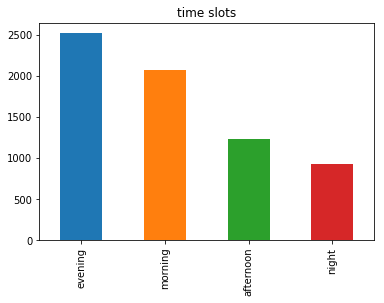

In [13]:
# Plotting the number of records of the given time slots in a bar plot
bar_4 = uber['Time_slot'].value_counts().plot(kind='bar',title="time slots")

In [27]:
# Creating a new column 'Supply_Demand' which categorizes 'Trip Completed' as supply and other unsuccesful states as no supply
 
conditions_2 = [ 
    (uber['Status'] == 'Trip Completed') ]
choices = ['Supply']
uber['Supply_Demand'] = np.select(conditions_2, choices, default='No Supply')
uber

,Request id,Pickup point,Driver id,Status,Request_date,Request_time,Drop_Date,Drop_Time,Request_hour,Time_slot,Supply_Demand
0,619,Airport,1.0,Trip Completed,11/7/2016,11:51,11/7/2016,13:00,11,morning,Supply
1,867,Airport,1.0,Trip Completed,11/7/2016,17:57,11/7/2016,18:47,17,afternoon,Supply
2,1807,City,1.0,Trip Completed,12/7/2016,9:17,12/7/2016,9:58,9,morning,Supply
3,2532,Airport,1.0,Trip Completed,12/7/2016,21:08,12/7/2016,22:03,21,evening,Supply
4,3112,City,1.0,Trip Completed,13-07-2016,08:33:16,13-07-2016,09:25:47,8,morning,Supply
5,3879,Airport,1.0,Trip Completed,13-07-2016,21:57:28,13-07-2016,22:28:59,21,evening,Supply
6,4270,Airport,1.0,Trip Completed,14-07-2016,06:15:32,14-07-2016,07:13:15,6,morning,Supply
7,5510,Airport,1.0,Trip Completed,15-07-2016,05:11:52,15-07-2016,06:07:52,5,night,Supply
8,6248,City,1.0,Trip Completed,15-07-2016,17:57:27,15-07-2016,18:50:51,17,afternoon,Supply
9,267,City,2.0,Trip Completed,11/7/2016,6:46,11/7/2016,7:25,6,morning,Supply


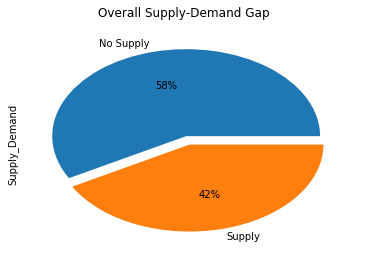

In [38]:
# Using explode to individually highlight the pie for supply
explode= (0.1, 0.0)

# Creating a pie-chart representing the overall gap between supply and demand 
pie_1= uber['Supply_Demand'].value_counts().plot(kind='pie',explode=explode, autopct='%1.0f%%',subplots=True, title="Overall Supply-Demand Gap")

# As we can see only 42% of all demands are sucessfully completed

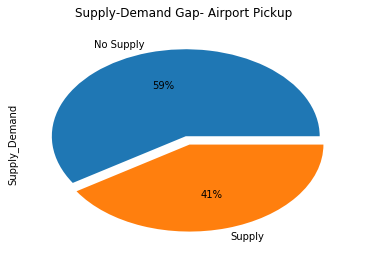

In [48]:
# Creating a pie-chart for representing the supply-demand gap specifically for airport pickup
uber_airport=uber[~uber['Pickup point'].isin(['City'])]
explode= (0.1, 0.0)

pie_1= uber_airport['Supply_Demand'].value_counts().plot(kind='pie',explode=explode, autopct='%1.0f%%',subplots=True,title="Supply-Demand Gap- Airport Pickup")

# For airport pickup the supply( No: of successfully completed requests) is only 41%

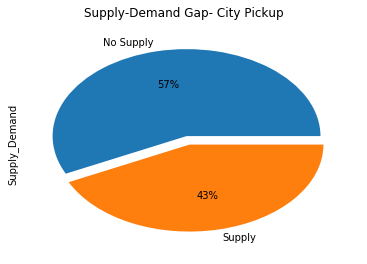

In [41]:
# Creating a pie-chart for representing the supply-demand gap specifically for city pickup
uber_city = uber[~uber['Pickup point'].isin(['Airport'])]
explode= (0.1, 0.0)

pie_1= uber_city['Supply_Demand'].value_counts().plot(kind='pie',explode=explode, autopct='%1.0f%%',subplots=True, title="Supply-Demand Gap- City Pickup")

# For city pickup the supply( No: of successfully completed requests) is only 43% which is slightly more than airport pickup

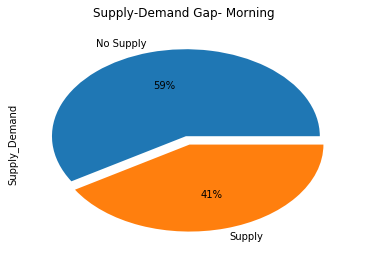

In [42]:
# Creating a pie-chart representing supply-demand gap specifically in the morning time
uber_morning = uber[~uber['Time_slot'].isin(['morning'])]
explode= (0.1, 0.0)

pie_1= uber_morning['Supply_Demand'].value_counts().plot(kind='pie',explode=explode, autopct='%1.0f%%',subplots=True, title="Supply-Demand Gap- Morning")

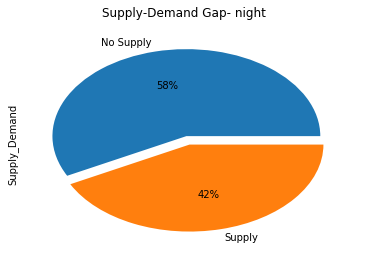

In [44]:
# Creating a pie-chart representing supply-demand gap specifically in the night time
uber_night = uber[~uber['Time_slot'].isin(['night'])]
explode= (0.1, 0.0)

pie_1= uber_night['Supply_Demand'].value_counts().plot(kind='pie',explode=explode, autopct='%1.0f%%',subplots=True, title="Supply-Demand Gap- night")